In [1]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import scipy.io as sp
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
data = sp.loadmat('dataset_battery_voltage/dataset1.mat')

In [4]:
n_sim = 56

sim_excluded_idx = [121, 128, 137]

print(data['RC1Model'][0][0][n_sim].shape)
sim1 = data['RC1Model'][0][0][n_sim]

sim2 = data['RC2Model'][0][0][n_sim]

d_sim = (sim1[:,4] - sim2[:,4]) / sim1[:,4]  * 100

(13902, 5)


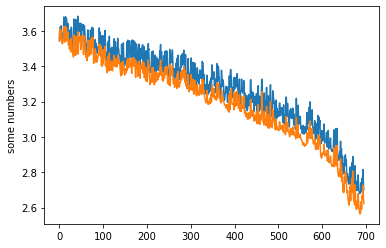

In [5]:
plt.plot(sim1[:,0], sim1[:,4])
plt.plot(sim2[:,0], sim2[:,4])
plt.ylabel('some numbers')
plt.show()

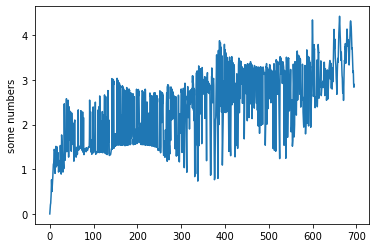

In [6]:
plt.plot(sim2[:,0], d_sim)

plt.ylabel('some numbers')
plt.show()


In [7]:
sim2_1 = data['RC2Model'][0][0][n_sim + 22]

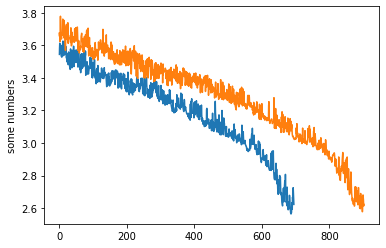

In [8]:
plt.figure()
plt.plot(sim2[:,0], sim2[:,4])
plt.plot(sim2_1[:, 0], sim2_1[:, 4])
plt.ylabel('some numbers')
plt.show()

In [9]:
columns=['time', 'courant', 'soc', 'temperature', 'voltage']

data_total_rc1 = pd.DataFrame(data['RC1Model'][0][0][0], columns=columns)
data_total_rc2 = pd.DataFrame(data['RC2Model'][0][0][0], columns=columns)

for sim in range(1, len(data['RC1Model'][0][0])):
    
    if sim in sim_excluded_idx:
        continue
        
    print("add sim :", sim)
    data_total_rc1 = data_total_rc1.append(pd.DataFrame(data['RC1Model'][0][0][sim], columns=columns))
    data_total_rc2 = data_total_rc2.append(pd.DataFrame(data['RC2Model'][0][0][sim], columns=columns))

data_total_rc1.reset_index(drop=True, inplace=True)
data_total_rc2.reset_index(drop=True, inplace=True)

add sim : 1
add sim : 2
add sim : 3
add sim : 4
add sim : 5
add sim : 6
add sim : 7
add sim : 8
add sim : 9
add sim : 10
add sim : 11
add sim : 12
add sim : 13
add sim : 14
add sim : 15


In [10]:
print(data_total_rc1.shape)
print(data_total_rc2.shape)

(560799, 5)
(560799, 5)


In [11]:
print(data_total_rc1)

           time    courant       soc  temperature   voltage
0          0.00  -1.155857  0.378709    59.152000  3.574415
1          0.05  -1.637309  0.378704    59.152014  3.549553
2          0.10  -2.118761  0.378697    59.152037  3.546643
3          0.15  -2.600214  0.378690    59.152073  3.543724
4          0.20  -3.081666  0.378681    59.152123  3.540801
...         ...        ...       ...          ...       ...
560794  2362.70 -10.797257  0.000110    59.210629  2.788547
560795  2362.75 -10.975452  0.000077    59.211151  2.787336
560796  2362.80 -11.153647  0.000044    59.211697  2.786117
560797  2362.85 -11.331842  0.000010    59.212269  2.784892
560798  2362.90 -11.510037 -0.000024    59.212867  2.783649

[560799 rows x 5 columns]


In [34]:
data_total = data_total_rc1.join(data_total_rc2, lsuffix='_rc1', rsuffix='_rc2')

In [35]:
print(data_total.shape)


(86142, 10)


In [48]:
data_total = data_total_rc1[-10:].join(data_total_rc2, lsuffix='_rc1', rsuffix='_rc2')

In [49]:
data_total

,time_rc1,courant_rc1,soc_rc1,temperature_rc1,voltage_rc1,time_rc2,courant_rc2,soc_rc2,temperature_rc2,voltage_rc2
86132,3036.20,-5.832706,0.000195,40.399043,2.822062,3036.20,-5.832706,0.000195,40.916498,2.780214
86133,3036.25,-6.218790,0.000177,40.399019,2.818947,3036.25,-6.218790,0.000177,40.916442,2.776914
86134,3036.30,-6.604873,0.000157,40.399030,2.815783,3036.30,-6.604873,0.000157,40.916422,2.773544
86135,3036.35,-6.990956,0.000136,40.399080,2.812570,3036.35,-6.990956,0.000136,40.916442,2.770107
86136,3036.40,-7.377039,0.000114,40.399169,2.809307,3036.40,-7.377039,0.000114,40.916504,2.766602
86137,3036.45,-7.763122,0.000091,40.399302,2.805996,3036.45,-7.763122,0.000091,40.916610,2.763029
86138,3036.50,-8.149205,0.000067,40.399480,2.802634,3036.50,-8.149205,0.000067,40.916763,2.759389
86139,3036.55,-8.535288,0.000042,40.399707,2.799222,3036.55,-8.535288,0.000042,40.916967,2.755683
86140,3036.60,-8.921371,0.000015,40.399984,2.795760,3036.60,-8.921371,0.000015,40.917224,2.751910
86141,3036.65,-9.307454,-0.000013,40.400315,2.792268,3036.65,-9.307454,-0.000013,40.917537,2.748092


In [50]:
data_total['delta_volt_rc2_rc1'] = data_total['voltage_rc2'] - data_total['voltage_rc1']

In [51]:
data_total

,time_rc1,courant_rc1,soc_rc1,temperature_rc1,voltage_rc1,time_rc2,courant_rc2,soc_rc2,temperature_rc2,voltage_rc2,delta_volt_rc2_rc1
86132,3036.20,-5.832706,0.000195,40.399043,2.822062,3036.20,-5.832706,0.000195,40.916498,2.780214,-0.041848
86133,3036.25,-6.218790,0.000177,40.399019,2.818947,3036.25,-6.218790,0.000177,40.916442,2.776914,-0.042033
86134,3036.30,-6.604873,0.000157,40.399030,2.815783,3036.30,-6.604873,0.000157,40.916422,2.773544,-0.042238
86135,3036.35,-6.990956,0.000136,40.399080,2.812570,3036.35,-6.990956,0.000136,40.916442,2.770107,-0.042463
86136,3036.40,-7.377039,0.000114,40.399169,2.809307,3036.40,-7.377039,0.000114,40.916504,2.766602,-0.042706
86137,3036.45,-7.763122,0.000091,40.399302,2.805996,3036.45,-7.763122,0.000091,40.916610,2.763029,-0.042967
86138,3036.50,-8.149205,0.000067,40.399480,2.802634,3036.50,-8.149205,0.000067,40.916763,2.759389,-0.043245
86139,3036.55,-8.535288,0.000042,40.399707,2.799222,3036.55,-8.535288,0.000042,40.916967,2.755683,-0.043540
86140,3036.60,-8.921371,0.000015,40.399984,2.795760,3036.60,-8.921371,0.000015,40.917224,2.751910,-0.043850
86141,3036.65,-9.307454,-0.000013,40.400315,2.792268,3036.65,-9.307454,-0.000013,40.917537,2.748092,-0.044177


In [54]:
data_total.drop(columns=['time_rc2', 'courant_rc2', 'soc_rc2'])

,time_rc1,courant_rc1,soc_rc1,temperature_rc1,voltage_rc1,temperature_rc2,voltage_rc2,delta_volt_rc2_rc1
86132,3036.20,-5.832706,0.000195,40.399043,2.822062,40.916498,2.780214,-0.041848
86133,3036.25,-6.218790,0.000177,40.399019,2.818947,40.916442,2.776914,-0.042033
86134,3036.30,-6.604873,0.000157,40.399030,2.815783,40.916422,2.773544,-0.042238
86135,3036.35,-6.990956,0.000136,40.399080,2.812570,40.916442,2.770107,-0.042463
86136,3036.40,-7.377039,0.000114,40.399169,2.809307,40.916504,2.766602,-0.042706
86137,3036.45,-7.763122,0.000091,40.399302,2.805996,40.916610,2.763029,-0.042967
86138,3036.50,-8.149205,0.000067,40.399480,2.802634,40.916763,2.759389,-0.043245
86139,3036.55,-8.535288,0.000042,40.399707,2.799222,40.916967,2.755683,-0.043540
86140,3036.60,-8.921371,0.000015,40.399984,2.795760,40.917224,2.751910,-0.043850
86141,3036.65,-9.307454,-0.000013,40.400315,2.792268,40.917537,2.748092,-0.044177


In [55]:
data_total

,time_rc1,courant_rc1,soc_rc1,temperature_rc1,voltage_rc1,time_rc2,courant_rc2,soc_rc2,temperature_rc2,voltage_rc2,delta_volt_rc2_rc1
86132,3036.20,-5.832706,0.000195,40.399043,2.822062,3036.20,-5.832706,0.000195,40.916498,2.780214,-0.041848
86133,3036.25,-6.218790,0.000177,40.399019,2.818947,3036.25,-6.218790,0.000177,40.916442,2.776914,-0.042033
86134,3036.30,-6.604873,0.000157,40.399030,2.815783,3036.30,-6.604873,0.000157,40.916422,2.773544,-0.042238
86135,3036.35,-6.990956,0.000136,40.399080,2.812570,3036.35,-6.990956,0.000136,40.916442,2.770107,-0.042463
86136,3036.40,-7.377039,0.000114,40.399169,2.809307,3036.40,-7.377039,0.000114,40.916504,2.766602,-0.042706
86137,3036.45,-7.763122,0.000091,40.399302,2.805996,3036.45,-7.763122,0.000091,40.916610,2.763029,-0.042967
86138,3036.50,-8.149205,0.000067,40.399480,2.802634,3036.50,-8.149205,0.000067,40.916763,2.759389,-0.043245
86139,3036.55,-8.535288,0.000042,40.399707,2.799222,3036.55,-8.535288,0.000042,40.916967,2.755683,-0.043540
86140,3036.60,-8.921371,0.000015,40.399984,2.795760,3036.60,-8.921371,0.000015,40.917224,2.751910,-0.043850
86141,3036.65,-9.307454,-0.000013,40.400315,2.792268,3036.65,-9.307454,-0.000013,40.917537,2.748092,-0.044177


In [60]:
columns=['time', 'courant', 'soc', 'temperature', 'voltage']


for i in range(140, 150):
    
    if i in sim_excluded_idx:
        continue
        
        
    print(f'simulation {i}')
    
    data_total_rc1 = pd.DataFrame(data['RC1Model'][0][0][i], columns=columns)
    data_total_rc2 = pd.DataFrame(data['RC2Model'][0][0][i], columns=columns)

    data_total_rc1.reset_index(drop=True, inplace=True)
    data_total_rc2.reset_index(drop=True, inplace=True)

    print(data_total_rc1.shape)
    print(data_total_rc2.shape)

    data_total = data_total_rc1.join(data_total_rc2, lsuffix='_rc1', rsuffix='_rc2')
    print(data_total.shape)

    data_total['delta_volt_rc2_rc1'] = data_total['voltage_rc2'] - data_total['voltage_rc1']
    data_total = data_total.drop(columns=['time_rc2', 'courant_rc2', 'soc_rc2'])

    data_total.to_csv(f'./dataset_battery_voltage/subset_test_sim{i}.csv', index=False)

simulation 140
(381, 5)
(381, 5)
(381, 10)
simulation 141
(861, 5)
(861, 5)
(861, 10)
simulation 142
(162, 5)
(162, 5)
(162, 10)
simulation 143
(5799, 5)
(5799, 5)
(5799, 10)
simulation 144
(14639, 5)
(14639, 5)
(14639, 10)
simulation 145
(5054, 5)
(5054, 5)
(5054, 10)
simulation 146
(6577, 5)
(6577, 5)
(6577, 10)
simulation 147
(4881, 5)
(4881, 5)
(4881, 10)
simulation 148
(7054, 5)
(7054, 5)
(7054, 10)
simulation 149
(26, 5)
(26, 5)
(26, 10)
